# Mushroom Clasification
- - - 
[revisar](https://www.kaggle.com/code/raghuchaudhary/mushroom-classification/notebook#Poisonous-=-1)

__Descripcion:__

+ Attribute Information: (classes: edible=e, poisonous=p)

+ cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

+ cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s

+ cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

+ bruises: bruises=t,no=f

+ odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

+ gill-attachment: attached=a,descending=d,free=f,notched=n

+ gill-spacing: close=c,crowded=w,distant=d

+ gill-size: broad=b,narrow=n

+ gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

+ stalk-shape: enlarging=e,tapering=t

+ stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

+ stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

+ stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

+ stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

+ stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

+ veil-type: partial=p,universal=u

+ veil-color: brown=n,orange=o,white=w,yellow=y

+ ring-number: none=n,one=o,two=t

+ ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

+ spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

+ population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

+ habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d*

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
mushroom = pd.read_csv('mushrooms.csv')
mushroom.head(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


## EDA 
- - -

In [3]:
mushroom.shape

(8124, 23)

In [4]:
mushroom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

Transforaremos los datos a tidpo __`category`__

In [21]:
mushroom = mushroom.astype('category')
mushroom.dtypes

class                       category
cap-shape                   category
cap-surface                 category
cap-color                   category
bruises                     category
odor                        category
gill-attachment             category
gill-spacing                category
gill-size                   category
gill-color                  category
stalk-shape                 category
stalk-root                  category
stalk-surface-above-ring    category
stalk-surface-below-ring    category
stalk-color-above-ring      category
stalk-color-below-ring      category
veil-type                   category
veil-color                  category
ring-number                 category
ring-type                   category
spore-print-color           category
population                  category
habitat                     category
dtype: object

Contamos con Variables categoricas unicamente

<AxesSubplot:>

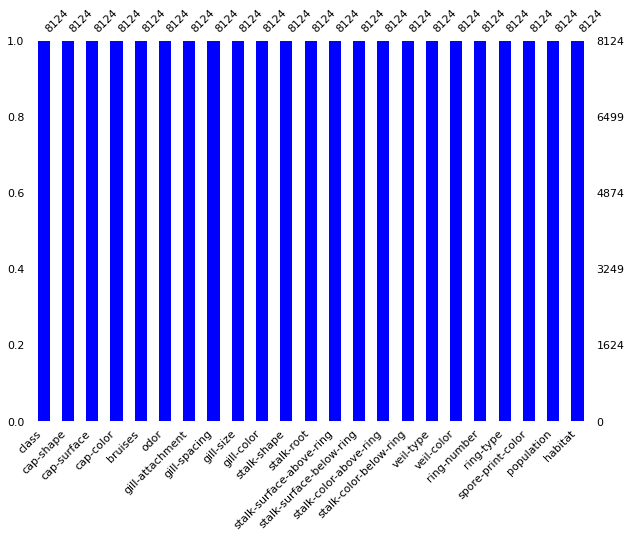

In [5]:
import missingno as msg

msg.bar(mushroom,color = 'blue',figsize=(10,7),fontsize = 11)

La base de Hongos no cuentan con ningun valor nulo dentro de el

**Descripcion de la base de datos**

In [22]:
mushroom.describe(include='category').T

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


Graficar las variables de la informacion de los hongos que tenemos

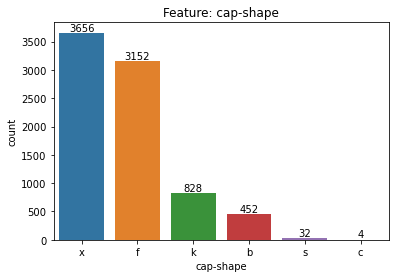

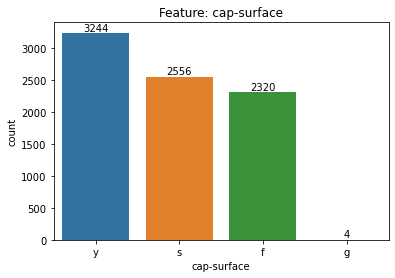

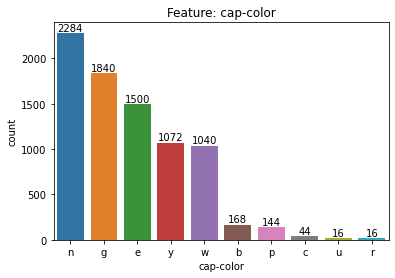

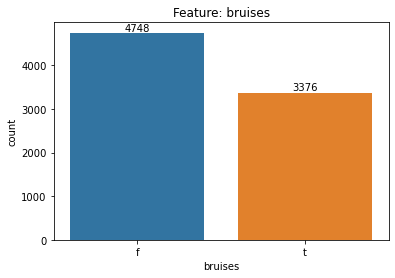

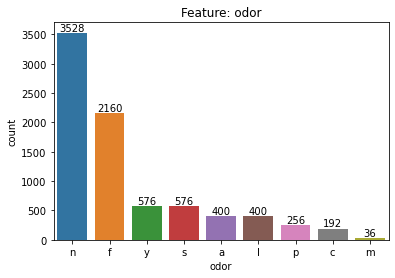

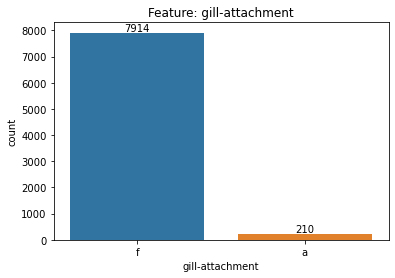

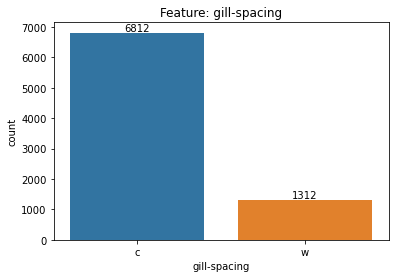

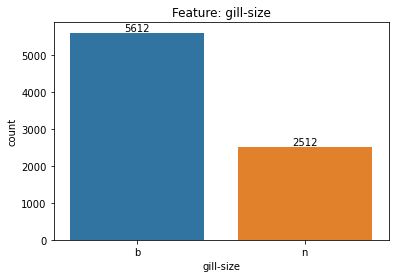

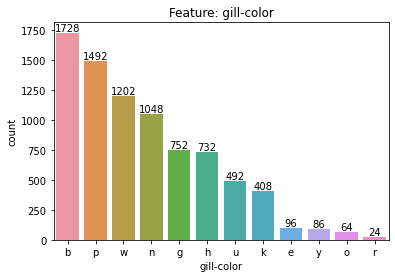

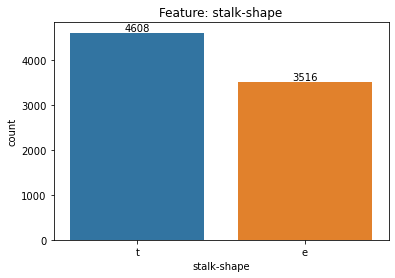

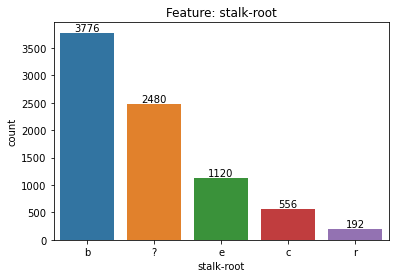

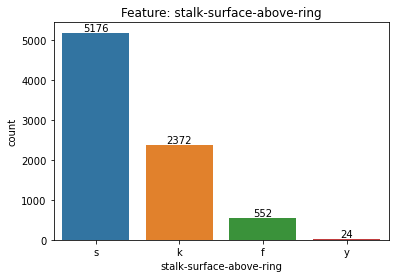

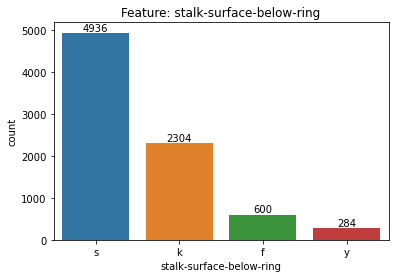

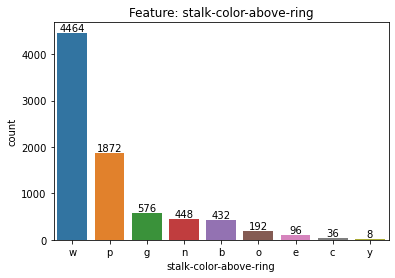

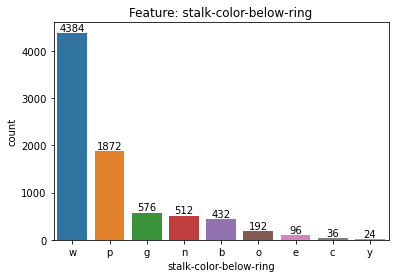

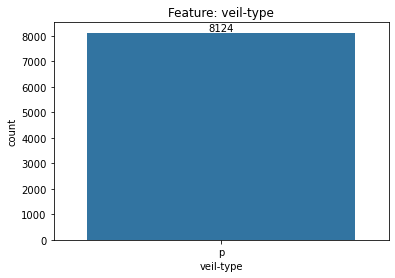

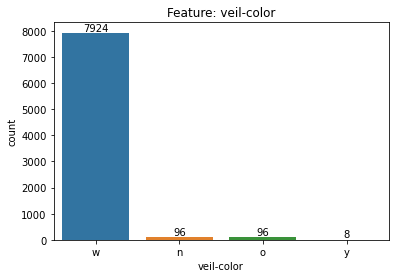

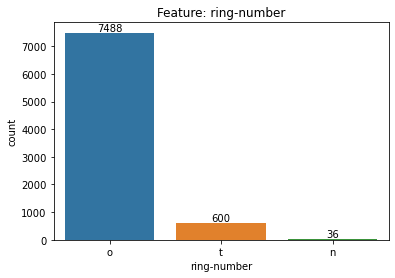

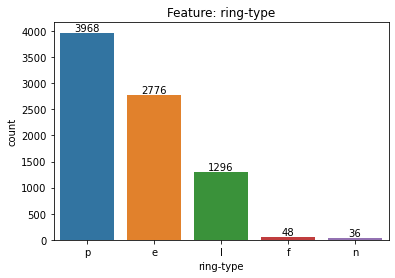

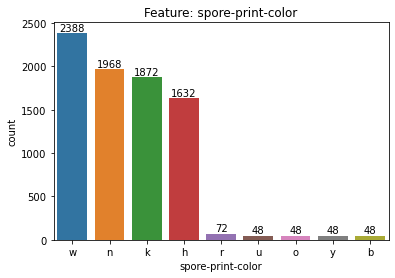

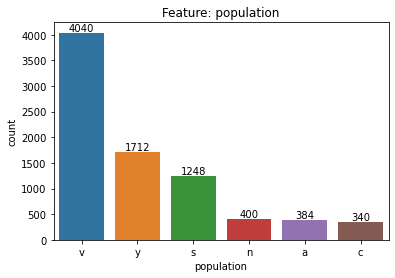

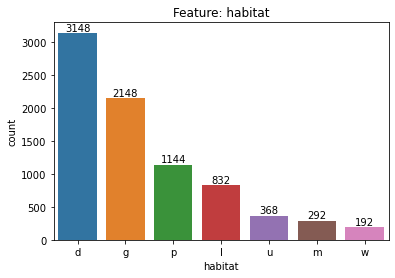

In [7]:
for features in mushroom.columns:
    if features!= 'class':
        import warnings
        warnings.filterwarnings('ignore')
        sns.countplot(mushroom[features],order = mushroom[features].value_counts().index).set_title('Feature: {}'.format(features))
        for index, value in enumerate(mushroom[features].value_counts().values):
            plt.text(index,value,str(value), ha = 'center', va= 'bottom')
        plt.show()

Se grafica la distribucion de los hongos por su clase: __`Comestible`__ y __`Venenosa`__ y por cada variable.

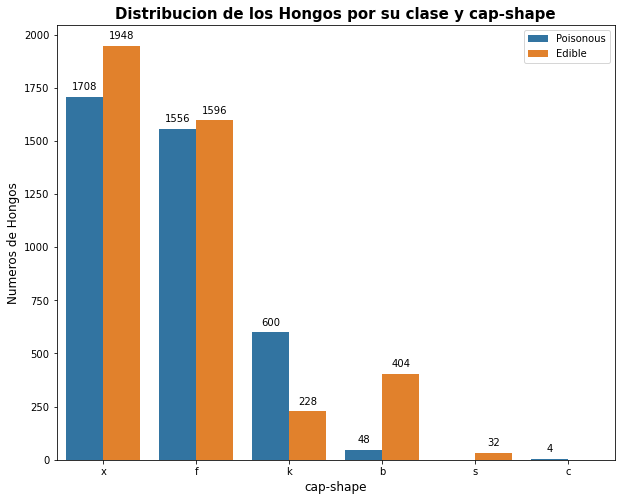

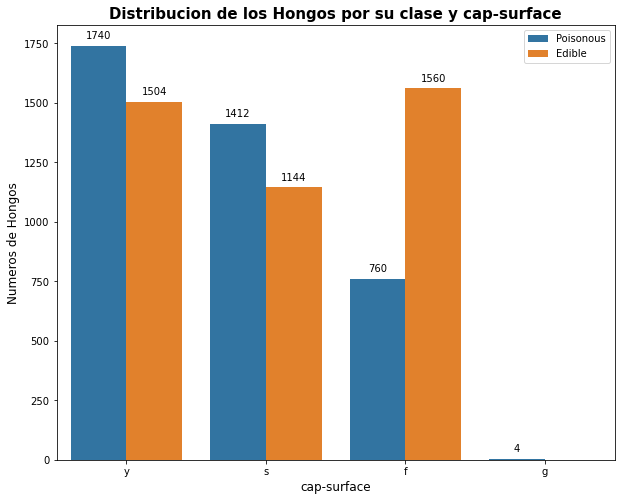

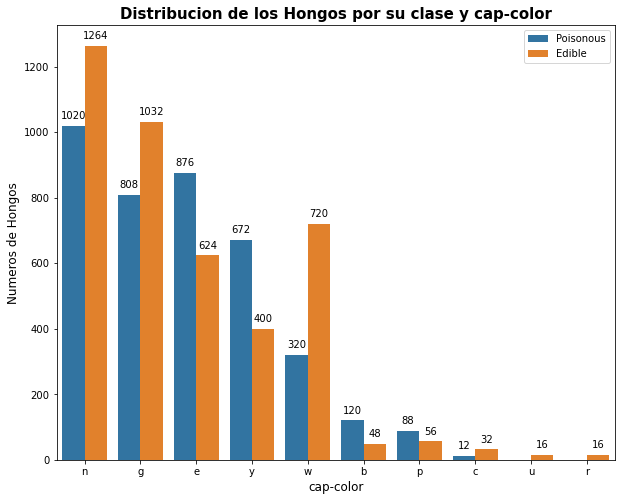

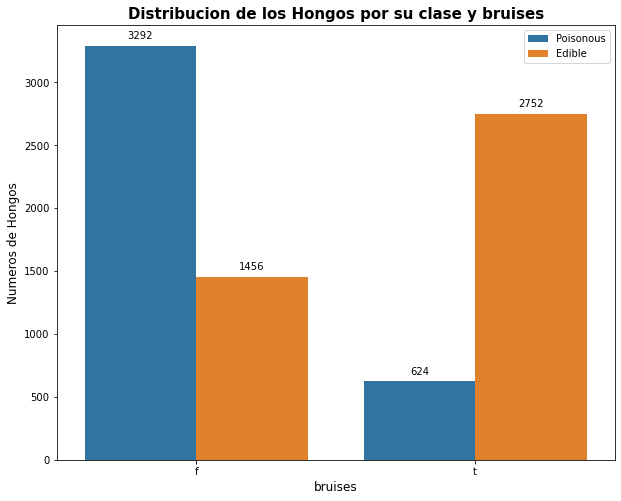

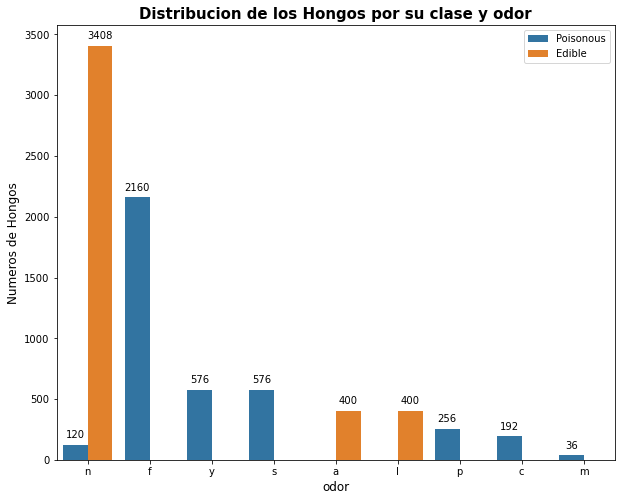

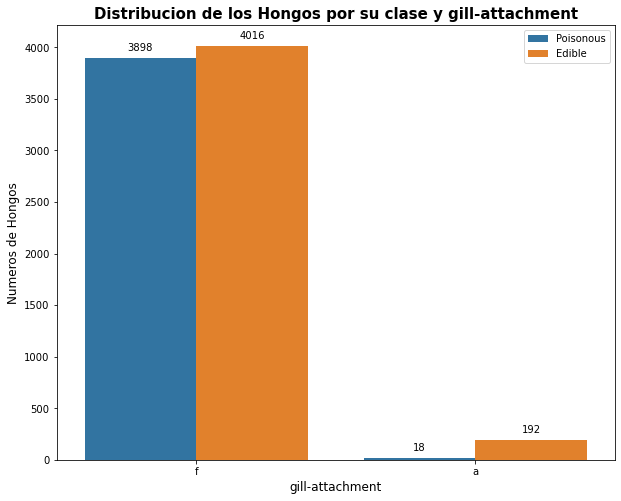

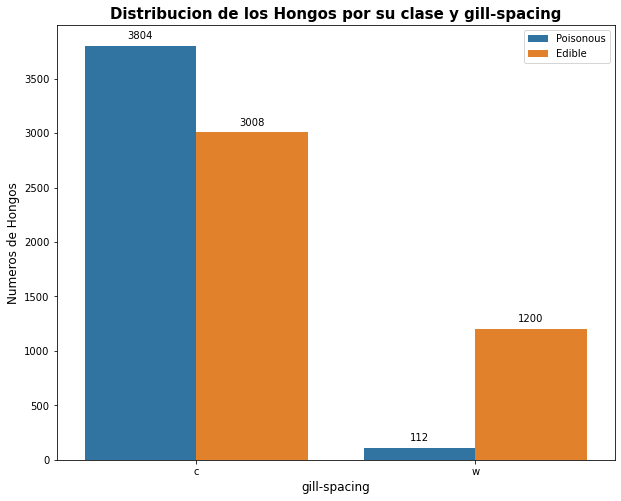

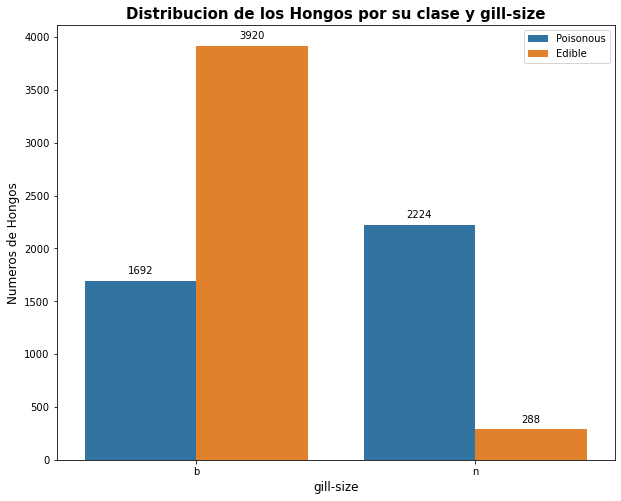

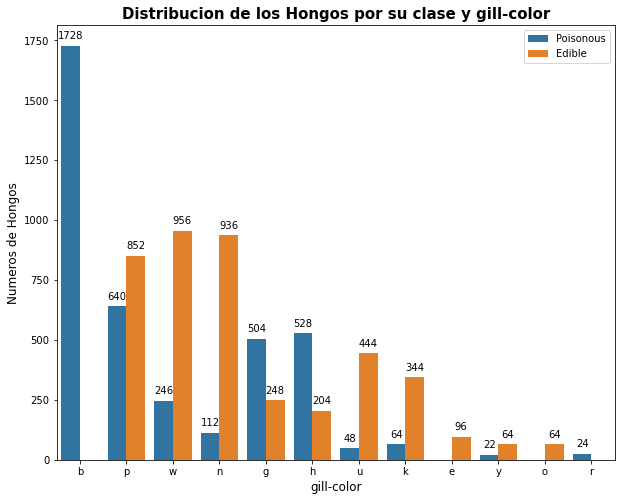

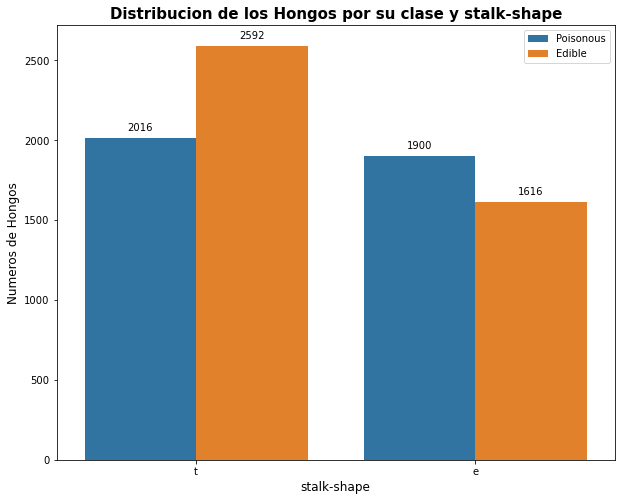

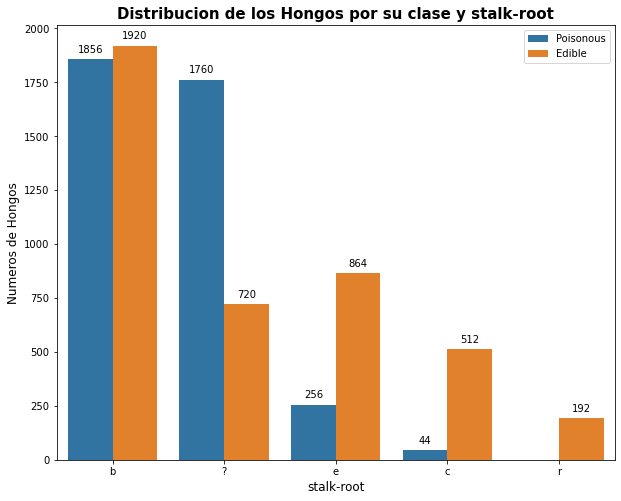

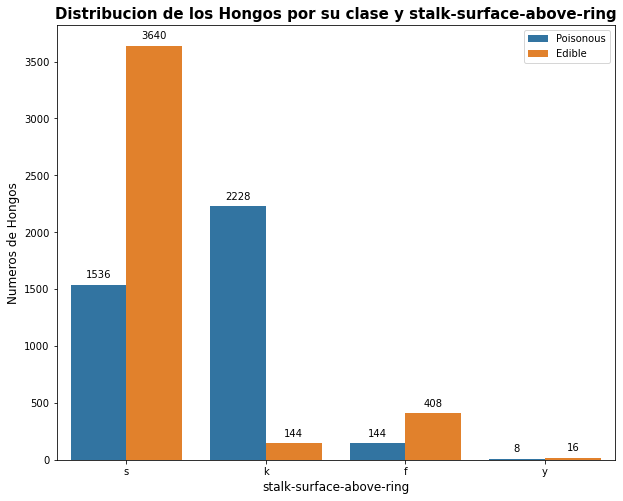

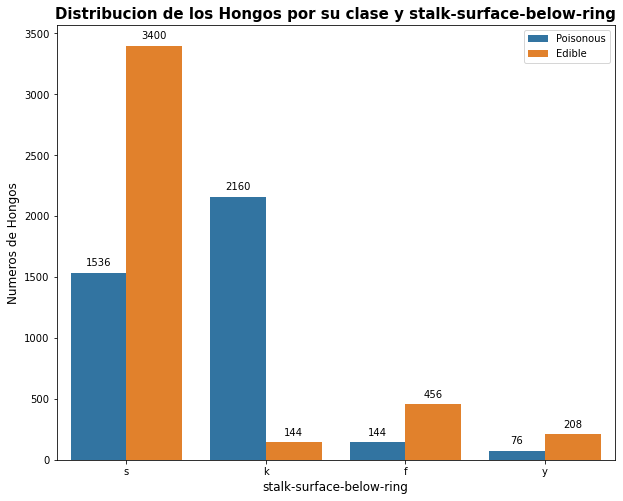

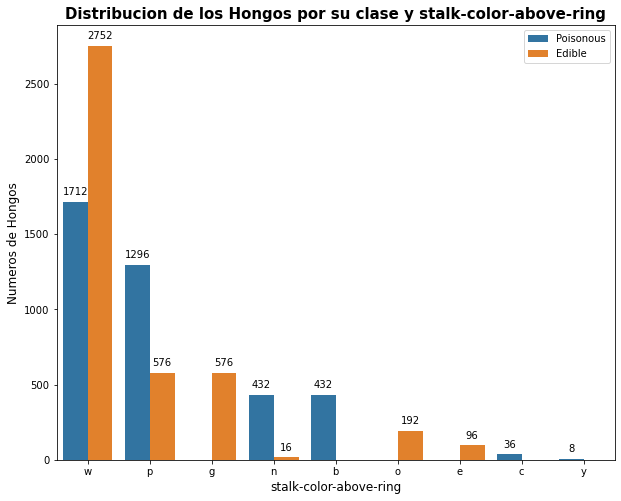

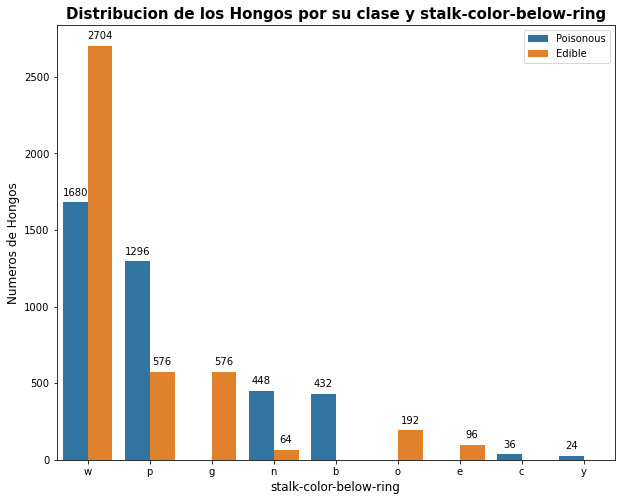

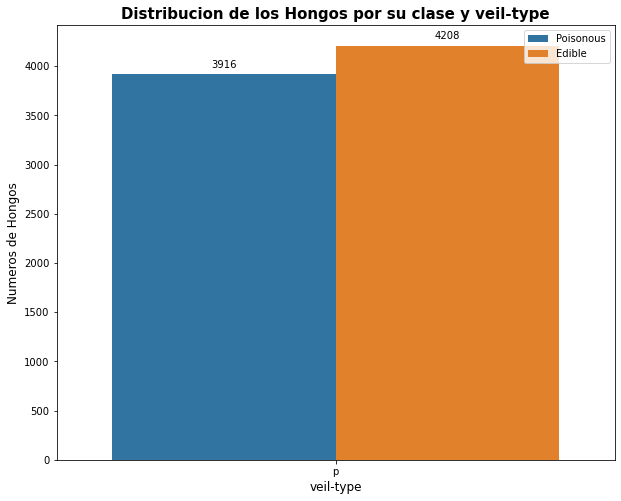

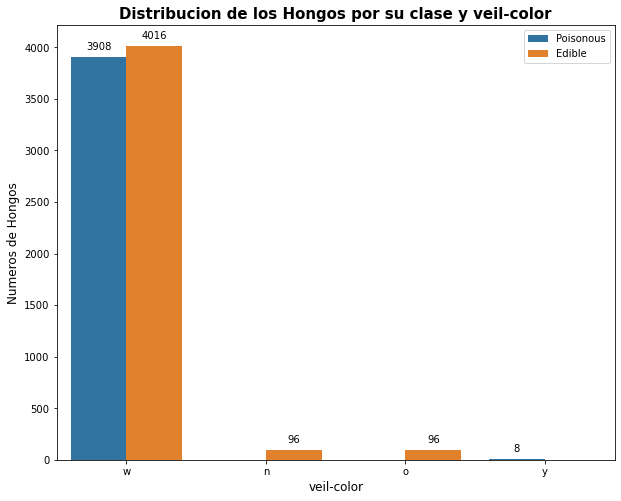

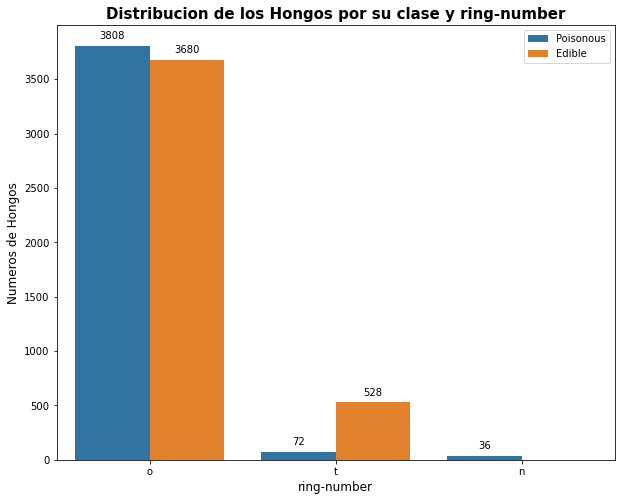

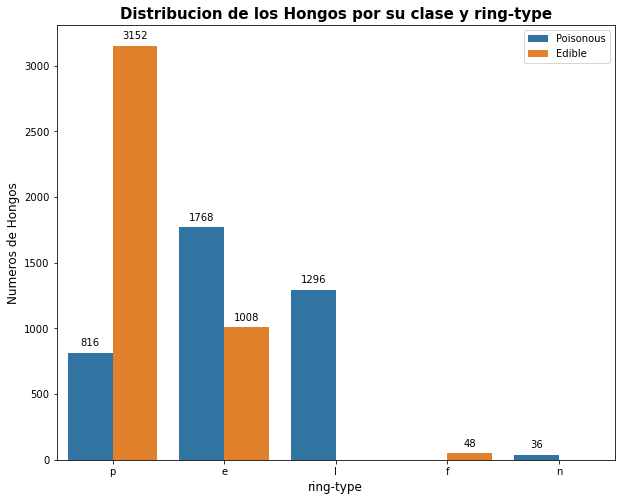

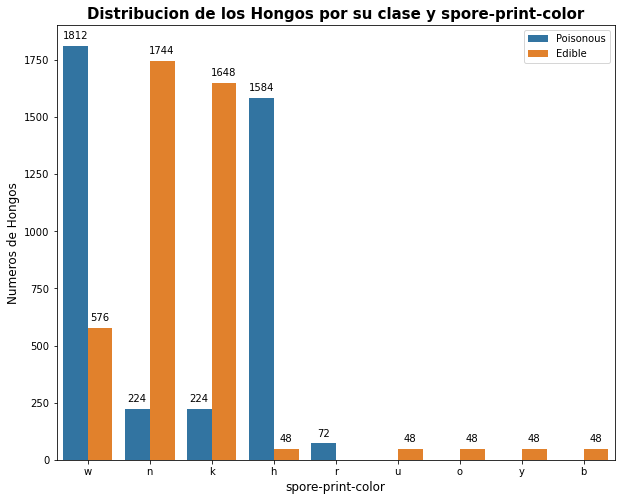

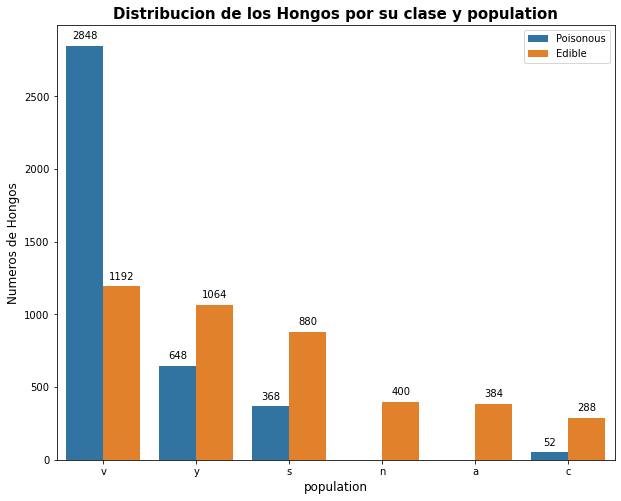

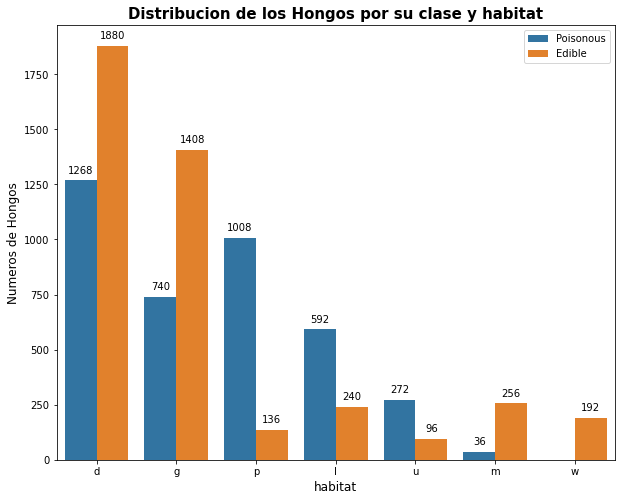

In [11]:
for columns in mushroom.columns:
    if columns != 'class':
        plt.figure(figsize=(10,8))
        multi_plot=sns.countplot(x = mushroom[columns],
                    hue = mushroom['class'],
                    order= mushroom[columns].value_counts().index)

        for p in multi_plot.patches:
            multi_plot.annotate(format(p.get_height(),'.0f'),
            (p.get_x() + p.get_width() / 2., p.get_height()),
            ha='center', va = 'center',
            xytext = (0,10),
            textcoords = 'offset points'
            )
        plt.ylabel('Numeros de Hongos',fontsize=12)
        plt.xlabel(columns,fontsize=12)
        plt.legend(['Poisonous','Edible'],loc = 'upper right')
        plt.title('Distribucion de los Hongos por su clase y '+columns,fontsize =15,fontweight='bold')
        plt.show()


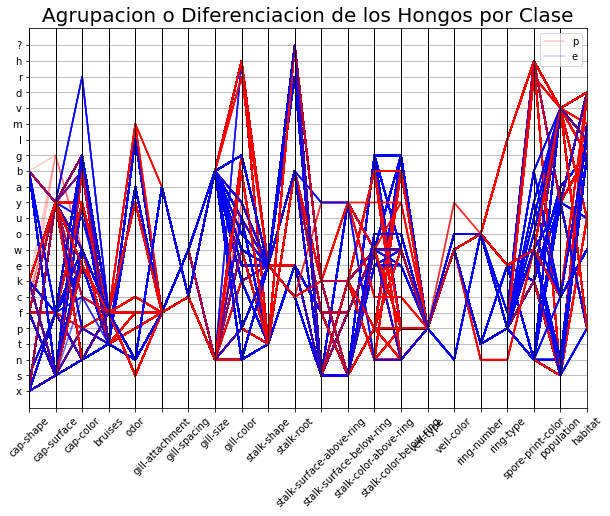

In [20]:
from pandas.plotting import parallel_coordinates

plt.figure(figsize=(10,7))
plt.title('Agrupacion o Diferenciacion de los Hongos por Clase',fontsize='20')
parallel_coordinates(mushroom,'class',color=('blue','red'))
plt.xticks(rotation=45)
plt.show()

---

## Machine Learning

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc, roc_curve

### Feature engineering

In [23]:
mushroom1 = mushroom.copy()

Como solo contamos con variables categoricas usaremos `LabelEncoder` para convertirlo a ordinal

In [26]:
labelenconder = LabelEncoder()
for colum in mushroom1.columns:
    mushroom1[colum] = labelenconder.fit_transform(mushroom1[colum])

#Revisemos de nuevo los datos
mushroom1.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [27]:
len(mushroom1.columns)

23

Revisaremos los valores de las variables que acabamos de transformar

In [34]:
for i in mushroom1.columns:
    print(f'Unique Value for {i}: ',mushroom1[i].unique())

Unique Value for class:  [1 0]
Unique Value for cap-shape:  [5 0 4 2 3 1]
Unique Value for cap-surface:  [2 3 0 1]
Unique Value for cap-color:  [4 9 8 3 2 5 0 7 1 6]
Unique Value for bruises:  [1 0]
Unique Value for odor:  [6 0 3 5 2 1 8 7 4]
Unique Value for gill-attachment:  [1 0]
Unique Value for gill-spacing:  [0 1]
Unique Value for gill-size:  [1 0]
Unique Value for gill-color:  [ 4  5  2  7 10  3  9  1  0  8 11  6]
Unique Value for stalk-shape:  [0 1]
Unique Value for stalk-root:  [3 2 1 4 0]
Unique Value for stalk-surface-above-ring:  [2 0 1 3]
Unique Value for stalk-surface-below-ring:  [2 0 3 1]
Unique Value for stalk-color-above-ring:  [7 3 6 4 0 2 5 1 8]
Unique Value for stalk-color-below-ring:  [7 6 3 0 4 2 8 5 1]
Unique Value for veil-type:  [0]
Unique Value for veil-color:  [2 0 1 3]
Unique Value for ring-number:  [1 2 0]
Unique Value for ring-type:  [4 0 2 1 3]
Unique Value for spore-print-color:  [2 3 6 1 7 5 4 8 0]
Unique Value for population:  [3 2 0 4 5 1]
Unique Val

Observamos que la variable `veil-type` solo tiene un valor que es 0, por lo cual no agrega nada al analisis, el cual se va a eliminar

In [35]:
mushroom1 = mushroom1.drop(columns=['veil-type'])

In [38]:
mushroom1.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1


Con las variables transformadas se vera la distribucion de ella en una grafica de violin por clase

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, 'cap-shape'),
  Text(1, 0, 'cap-surface'),
  Text(2, 0, 'cap-color'),
  Text(3, 0, 'bruises'),
  Text(4, 0, 'odor'),
  Text(5, 0, 'gill-attachment'),
  Text(6, 0, 'gill-spacing'),
  Text(7, 0, 'gill-size'),
  Text(8, 0, 'gill-color'),
  Text(9, 0, 'stalk-shape'),
  Text(10, 0, 'stalk-root'),
  Text(11, 0, 'stalk-surface-above-ring'),
  Text(12, 0, 'stalk-surface-below-ring'),
  Text(13, 0, 'stalk-color-above-ring'),
  Text(14, 0, 'stalk-color-below-ring'),
  Text(15, 0, 'veil-color'),
  Text(16, 0, 'ring-number'),
  Text(17, 0, 'ring-type'),
  Text(18, 0, 'spore-print-color'),
  Text(19, 0, 'population'),
  Text(20, 0, 'habitat')])

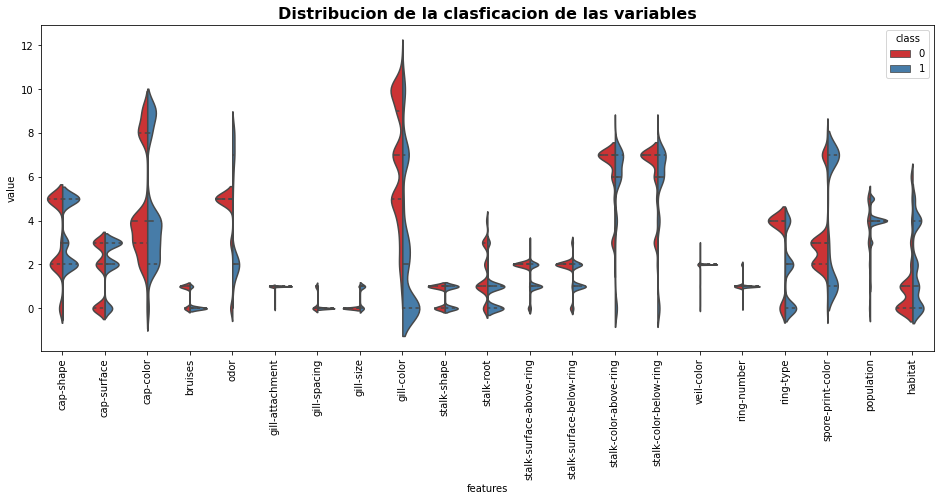

In [61]:
# Violin PLot
df_div = pd.melt(mushroom1,'class',var_name='features')
plt.subplots(figsize=(16,6))
sns.violinplot(data = df_div, x = 'features',y = 'value',
                hue = 'class',split=True, inner = 'quartile',
                palette='Set1',)
plt.title('Distribucion de la clasficacion de las variables',fontsize= 16,fontweight='bold')
plt.xticks(rotation= 90)

Text(0.5, 1.0, 'Matriz de correlación')

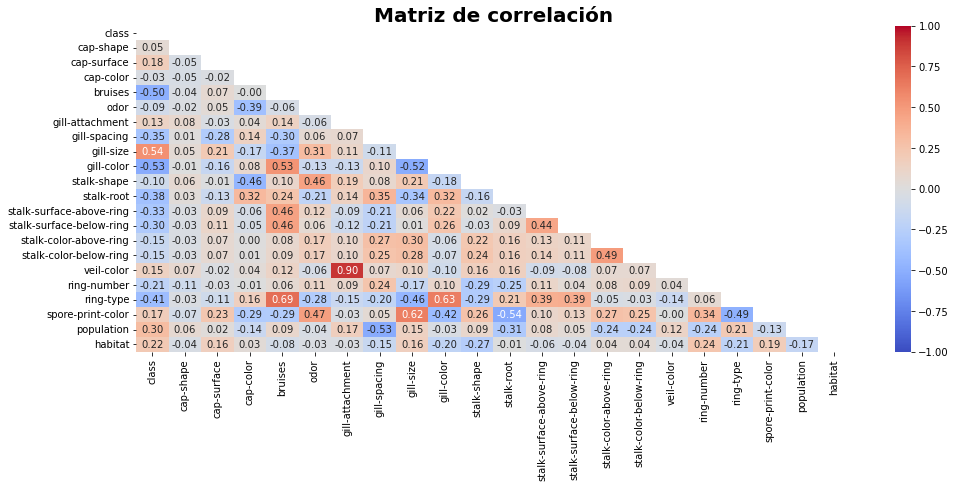

In [81]:
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(mushroom1.corr(), dtype=bool))
mush = sns.heatmap(mushroom1.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='coolwarm', fmt=".2f",annot_kws={'size':10})
mush.set_title('Matriz de correlación', fontdict={'fontsize':20,'fontweight':'bold'}, pad=3 )

Por lo general en casos de clasificacion la variable con menos correlacion es la mas importante, este caso `gill-color` (-0.53) por lo tanto se revisara mas de cerca.

In [65]:
mushroom1[['class','gill-color']].groupby(['gill-color'],
                                            as_index=False).mean().sort_values(by='class',
                                            ascending=False)

,gill-color,class
0,0,1.000000
8,8,1.000000
3,3,0.721311
2,2,0.670213
7,7,0.428954
11,11,0.255814
10,10,0.204659
4,4,0.156863
5,5,0.106870
9,9,0.097561


Para tener una mejor vision de los datos es mejor graficarla

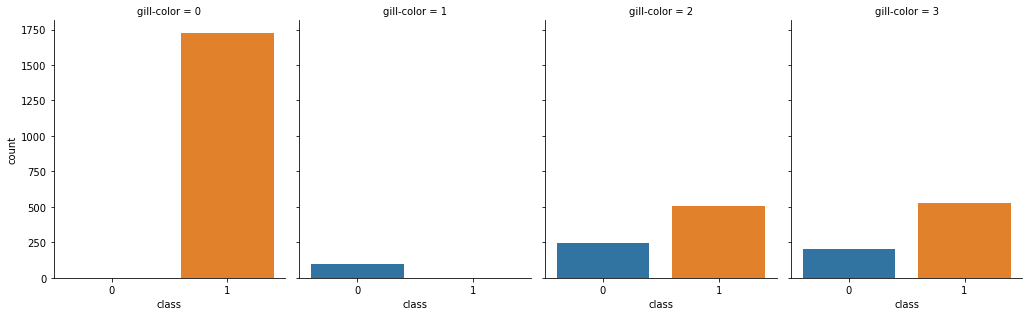

In [79]:
new_var = mushroom1[['class', 'gill-color']]
new_var = new_var[new_var['gill-color']<=3.5]
sns.catplot(x = 'class', col='gill-color', data=new_var, kind='count', height=4.5, aspect=.8, col_wrap=4);

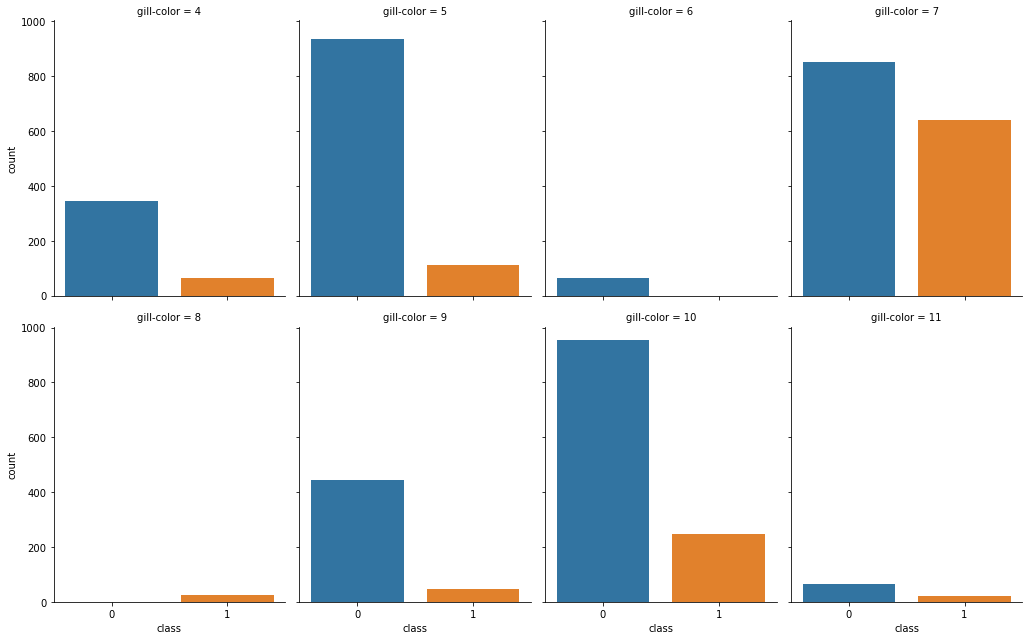

In [78]:
new_var = mushroom1[['class', 'gill-color']]
new_var = new_var[new_var['gill-color']>3.5]
sns.catplot(x = 'class', col='gill-color', data=new_var, kind='count', height=4.5, aspect=.8, col_wrap=4);

separa los predictores de la variable respuesta

In [80]:
X = mushroom1.drop(columns=['class'])
y = mushroom1['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1)

### Metodos de Clasificacion

####  Decision Tree Classification

In [82]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

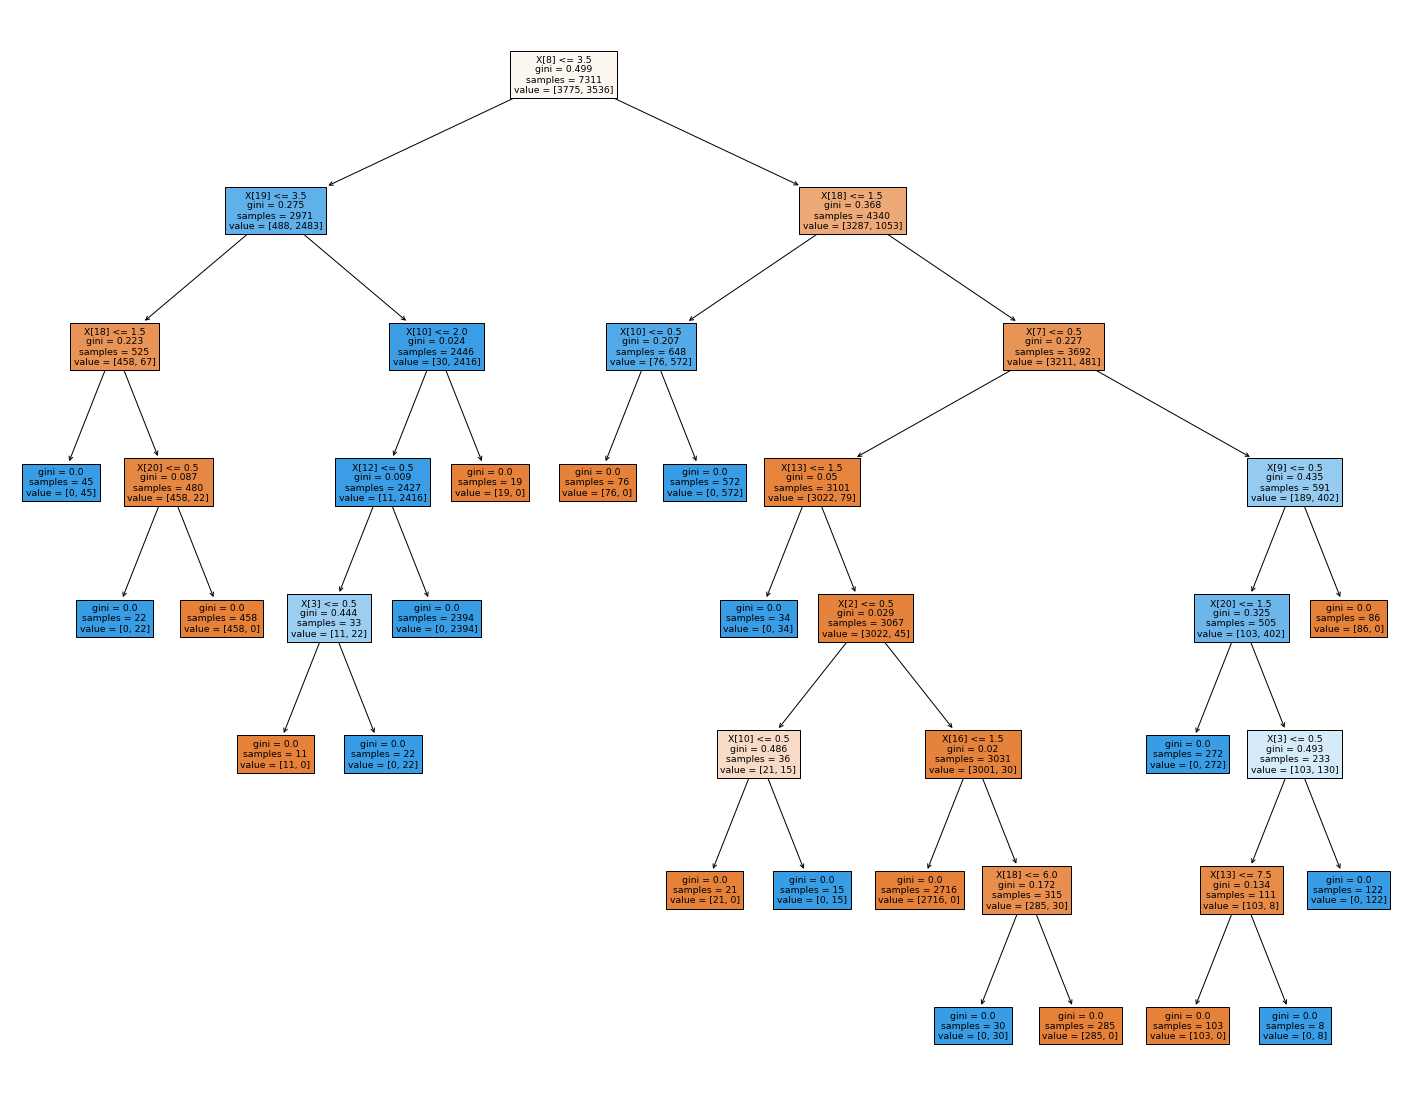

In [92]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt,
                    filled = True)

__Caracteristicas Importantes__

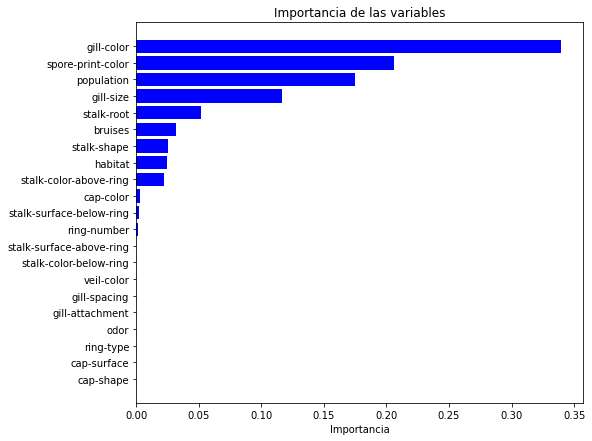

In [100]:
features_list = X.columns.values
feature_importance = dt.feature_importances_
sorted_idx = np.argsort(feature_importance)
plt.figure(figsize=(8,7))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center', color ="blue")
plt.yticks(range(len(sorted_idx)), features_list[sorted_idx])
plt.xlabel('Importancia')
plt.title('Importancia de las variables')
plt.draw()


__Prediciendo y estimando el resultado del modelo__

In [101]:
y_pred_dt = dt.predict(X_test)

print("Reporte del arbol de desicion: \n",
        classification_report(y_test,y_pred_dt))

print("Test Accuracy: {}%".format(round(dt.score(X_test,y_test)*100,2)))

Reporte del arbol de desicion: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       433
           1       1.00      1.00      1.00       380

    accuracy                           1.00       813
   macro avg       1.00      1.00      1.00       813
weighted avg       1.00      1.00      1.00       813

Test Accuracy: 100.0%


__Confusion Matrix for Decision Tree Classifiers__

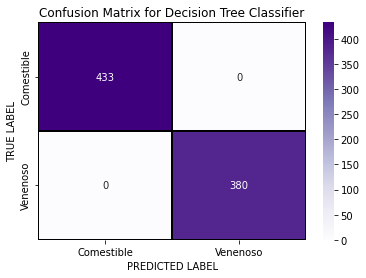

In [109]:
cm = confusion_matrix(y_test,y_pred_dt)
x_axis_labels = ["Comestible", "Venenoso"]
y_axis_labels = ["Comestible", "Venenoso"]
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", cmap="Purples",
            xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()